# Assignment 1
## Basic Hebbian Learning

In [37]:
import numpy as np
from matplotlib import pyplot as plt

1. Load the dataset

In [38]:
uu = np.loadtxt("../dataset2_lab_2_1.csv", delimiter=",", unpack=True)
print(uu)

[[  12.  3504. ]
 [  11.5 3693. ]
 [  11.  3436. ]
 [  12.  3433. ]
 [  10.5 3449. ]
 [  10.  4341. ]
 [   9.  4354. ]
 [   8.5 4312. ]
 [  10.  4425. ]
 [   8.5 3850. ]
 [  17.5 3090. ]
 [  11.5 4142. ]
 [  11.  4034. ]
 [  10.5 4166. ]
 [  11.  3850. ]
 [  10.  3563. ]
 [   8.  3609. ]
 [   8.  3353. ]
 [   9.5 3761. ]
 [  10.  3086. ]
 [  15.  2372. ]
 [  15.5 2833. ]
 [  15.5 2774. ]
 [  16.  2587. ]
 [  14.5 2130. ]
 [  20.5 1835. ]
 [  17.5 2672. ]
 [  14.5 2430. ]
 [  17.5 2375. ]
 [  12.5 2234. ]
 [  15.  2648. ]
 [  14.  4615. ]
 [  15.  4376. ]
 [  13.5 4382. ]
 [  18.5 4732. ]
 [  14.5 2130. ]
 [  15.5 2264. ]
 [  14.  2228. ]
 [  19.  2046. ]
 [  20.  1978. ]
 [  13.  2634. ]
 [  15.5 3439. ]
 [  15.5 3329. ]
 [  15.5 3302. ]
 [  15.5 3288. ]
 [  12.  4209. ]
 [  11.5 4464. ]
 [  13.5 4154. ]
 [  13.  4096. ]
 [  11.5 4955. ]
 [  12.  4746. ]
 [  12.  5140. ]
 [  13.5 2962. ]
 [  19.  2408. ]
 [  15.  3282. ]
 [  14.5 3139. ]
 [  14.  2220. ]
 [  14.  2123. ]
 [  19.5 2074.

In [39]:
uu[:,0] = uu[:,0]/np.linalg.norm(uu[:,0])
uu[:,1] = uu[:,1]/np.linalg.norm(uu[:,1])

u = uu

2. Implement a linear firing rate model

In [41]:
def linear_model(u,w):
    return np.dot(u,w)

3. Implement Basic Hebb Rule

In [42]:
name = 'Basic Hebbian Rule'
#randomly initialized weight vector, from a uniform distribution [-1,1]
w = np.random.rand(2)*2 - 1 

#parameters
eta = 0.01
threshold = 1e-3
epochs = 1000

#to keep track of evolution of w during training
w_hist = w
wold = w


for N in range (epochs):


    if N % (epochs/10) == 0: #to print epochs multiple of 100
        print(f"Epoch {N} of {epochs}")

    #shuffle the input dataset
    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        #Compute output
        v = linear_model(uu[i], w)
        #Hebbian rule
        w = w + eta*v*uu[i]

        w_hist = np.vstack((w_hist, w))

    #stop learning if w stabilizes
    if np.linalg.norm(w-wold) < threshold:
        print(f"Stopped at epoch {N} because of w convergence")
        break
    #to prevent overflow:
    if np.linalg.norm(w) > 1e50:
       print(f"Stopped at epoch {N} to prevent overflow")
       break
    wold = w

print('Training finished')

Epoch 0 of 1000
Epoch 100 of 1000
Epoch 200 of 1000
Epoch 300 of 1000
Epoch 400 of 1000
Epoch 500 of 1000
Epoch 600 of 1000
Epoch 700 of 1000
Epoch 800 of 1000
Epoch 900 of 1000
Training finished


Make plot (P2), plotting:
 - the evolution in time of the two components of the weight vector w
 - the evolution in time of the norm of the weight vector


406001
406001


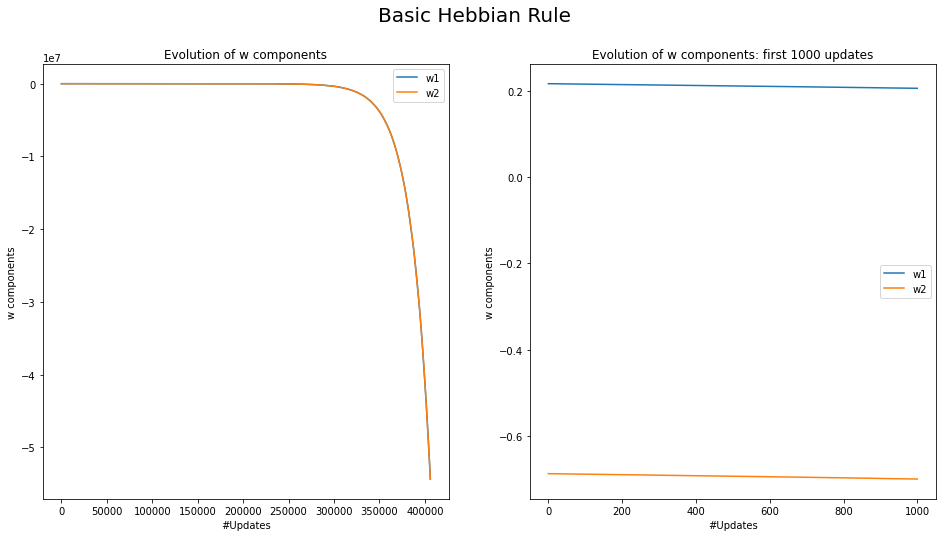

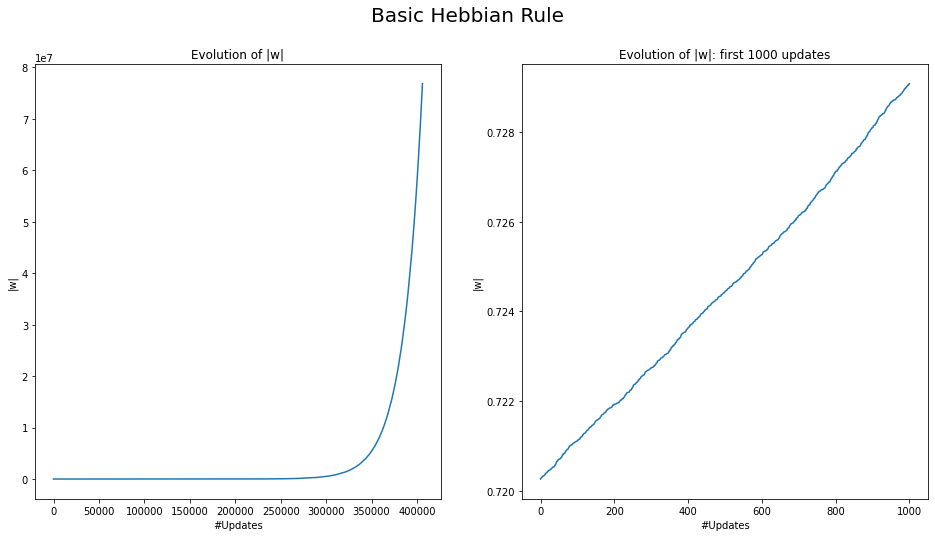

In [43]:
#plot P2
w1 = (np.transpose(w_hist))[0]
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)

ax1 = plt.subplot(1,2,1)
plt.title('Evolution of w components')
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
ax1.set_xlabel('#Updates')
ax1.set_ylabel('w components')
plt.legend()

ax2 = plt.subplot(1,2,2)
xmax = min(1000,len(t))
plt.title(f'Evolution of w components: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w1[mask], label='w1')
plt.plot(t[mask], w2[mask], label='w2')
plt.legend()
ax2.set_xlabel('#Updates')
ax2.set_ylabel('w components')

plt.savefig('P2' + name + '_w_evolution',format='pdf')


plt.figure(figsize=(16, 8))
plt.suptitle(name, fontsize=20)
ax1 = plt.subplot(1,2,1)
plt.title('Evolution of |w|')
ax1.set_ylabel('|w|')
ax1.set_xlabel('#Updates')
plt.plot(t, w_norm)



print(len(w_norm))
print(len(t))
ax2 = plt.subplot(1,2,2)
xmax = min(1000,len(t))
plt.title(f'Evolution of |w|: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w_norm[mask])
ax2.set_ylabel('|w|')
ax2.set_xlabel('#Updates')

plt.savefig('P2' + name + '_w_norm_evolution',format='pdf')


plt.show()

- We see that this rule is not stable, as we have an unbounded growth of |w|.


Compute correlation matrix, and its principal eigenvector

In [44]:
Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])
Q = Q/len(u)

print('Correlation matrix:\n',Q)

#Compute eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(Q)

#Principal eigenvector
max_eigvect = eig_vec[:,np.argmax(eig_val)]
print('\nMax eigvect:\n',max_eigvect)

Correlation matrix:
 [[0.00246305 0.00228038]
 [0.00228038 0.00246305]]

Max eigvect:
 [0.70710678 0.70710678]


Make plot (P1), displaying:
 - the training data points
 - the final weight vector w resulting from the learning process
 - the principal eigenvector of input correlation matrix Q


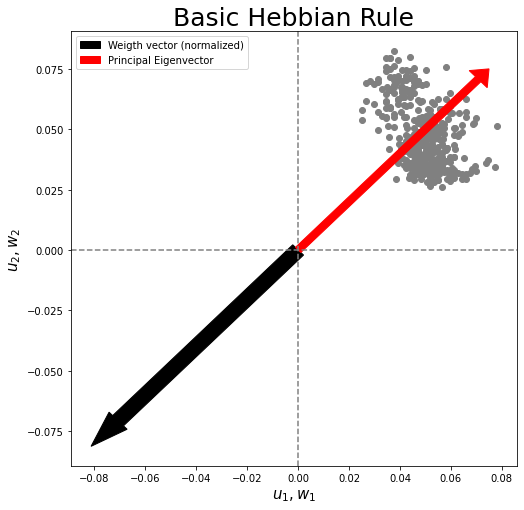

In [47]:
#P1
plt.figure(figsize=(8, 8))
plt.title(name, fontsize = 25)
#plot x,y axis
plt.axhline(y=0, color='grey', linestyle = '--')
plt.axvline(x=0, color='grey', linestyle = '--')

#plot inputs
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2, color= 'grey')

#normalized weigth vector
plt.arrow(0,0, 0.1*w[0]/np.linalg.norm(w), 0.1*w[1]/np.linalg.norm(w) , width=0.006, head_width=0.01, head_length=0.015, label='Weigth vector (normalized)', color = 'black')
#plt.arrow( np.mean(u[:,0]), np.mean(u[:,1]), 0.01*max_eigvect[0], 0.01*max_eigvect[1] , width=0.0003, head_width=0.0001, head_length=0.0, label='Principal Eigenvector', color = 'red')

#plt.quiver(w[0],w[1])
#principal eigenvector
plt.arrow(0,0, 0.1*max_eigvect[0], 0.1*max_eigvect[1] , width=0.003, head_width=0.01, head_length=0.006, label='Principal Eigenvector', color = 'red')
#plt.arrow( np.mean(u[:,0]), np.mean(u[:,1]), 0.01*max_eigvect[0], 0.01*max_eigvect[1] , width=0.0003, head_width=0.0001, head_length=0.0, label='Principal Eigenvector', color = 'red')

#plt.quiver(max_eigvect[0], max_eigvect[1], color='red')
plt.xlabel('$u_1, w_1$', fontsize=15)
plt.ylabel('$u_2, w_2$', fontsize=15)
plt.legend()

plt.savefig('P1' + name,format='pdf')
plt.show()

We see, as espected, that the final weight vector is parallel to the principal eigenvector of the correlation matrix.